In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Categorical plots - отображают статистические метрики для каждой из категорий переменной
>
Например, среднее значение переменной для каждой категории или количество строк для каждой категории
>
Это эквивалентно вызову функции groupby()
>
Виды графиков:
>
countplot() - подсчитывает количество строк по категориям
>
barplot() - позволяет выбрать любую метрику для оси y. Например можем нарисовать среднее значение или среднеквадратичное отклонение для каждой категории
>
Столбцы выглядят непрерывными и всегда следует добавлять описание для этих графиков

In [ ]:
df = pd.read_csv('dm_office_sales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


График countplot

<Axes: xlabel='level of education', ylabel='count'>

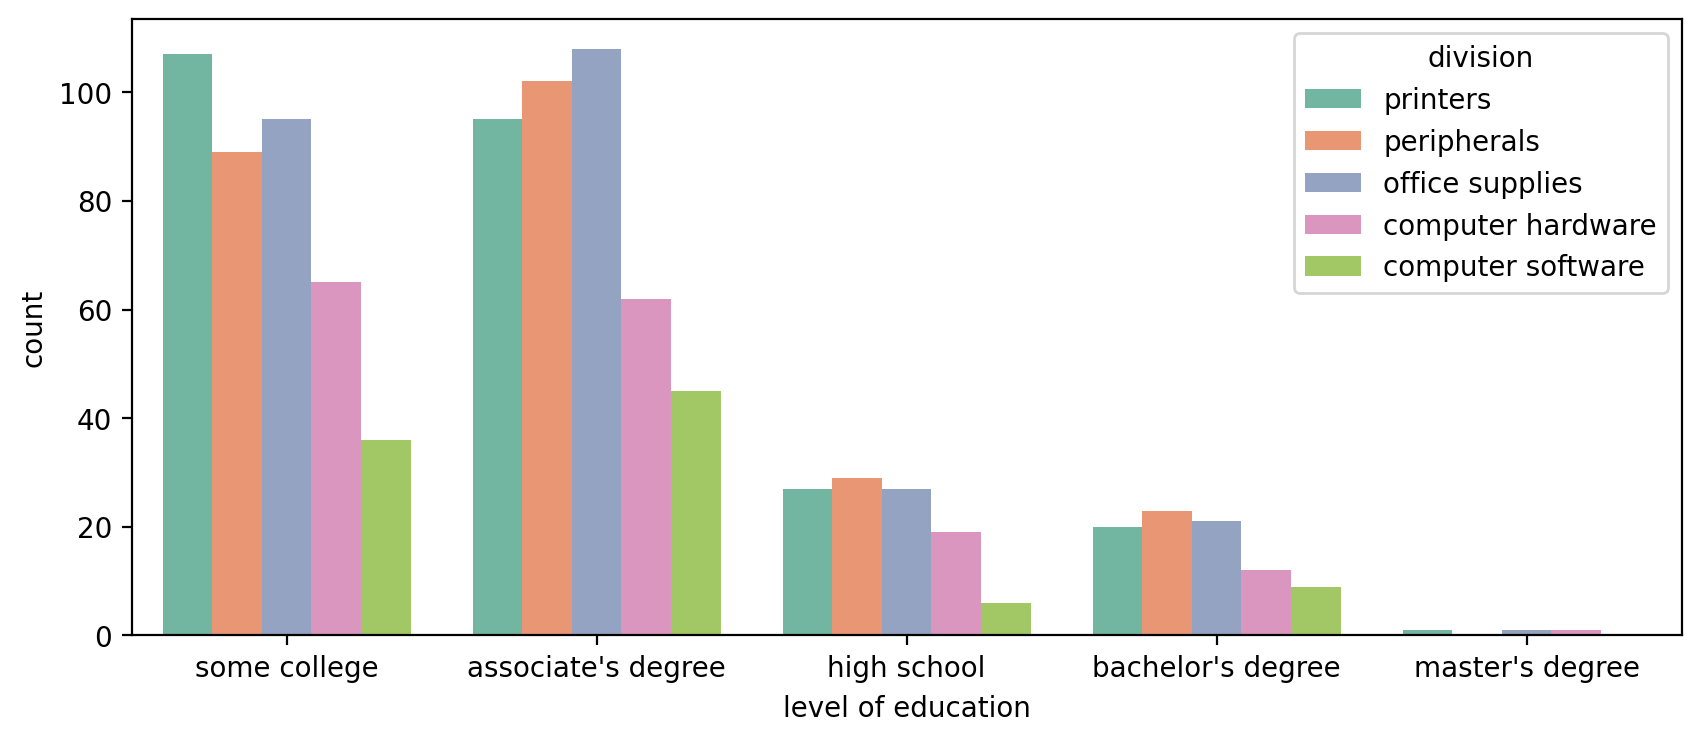

In [ ]:
plt.figure(figsize=(10,4), dpi = 200)


sns.countplot(x='level of education', data=df, hue = 'division', palette='Set2')
#подсчитали количество строк в колонке 'level of education' и сгруппировали их
#также с помощью hue = 'division' разделили людей на подразделения, в которых они работают
#palette='Set2' - поменяли цвет графиков

График barplot

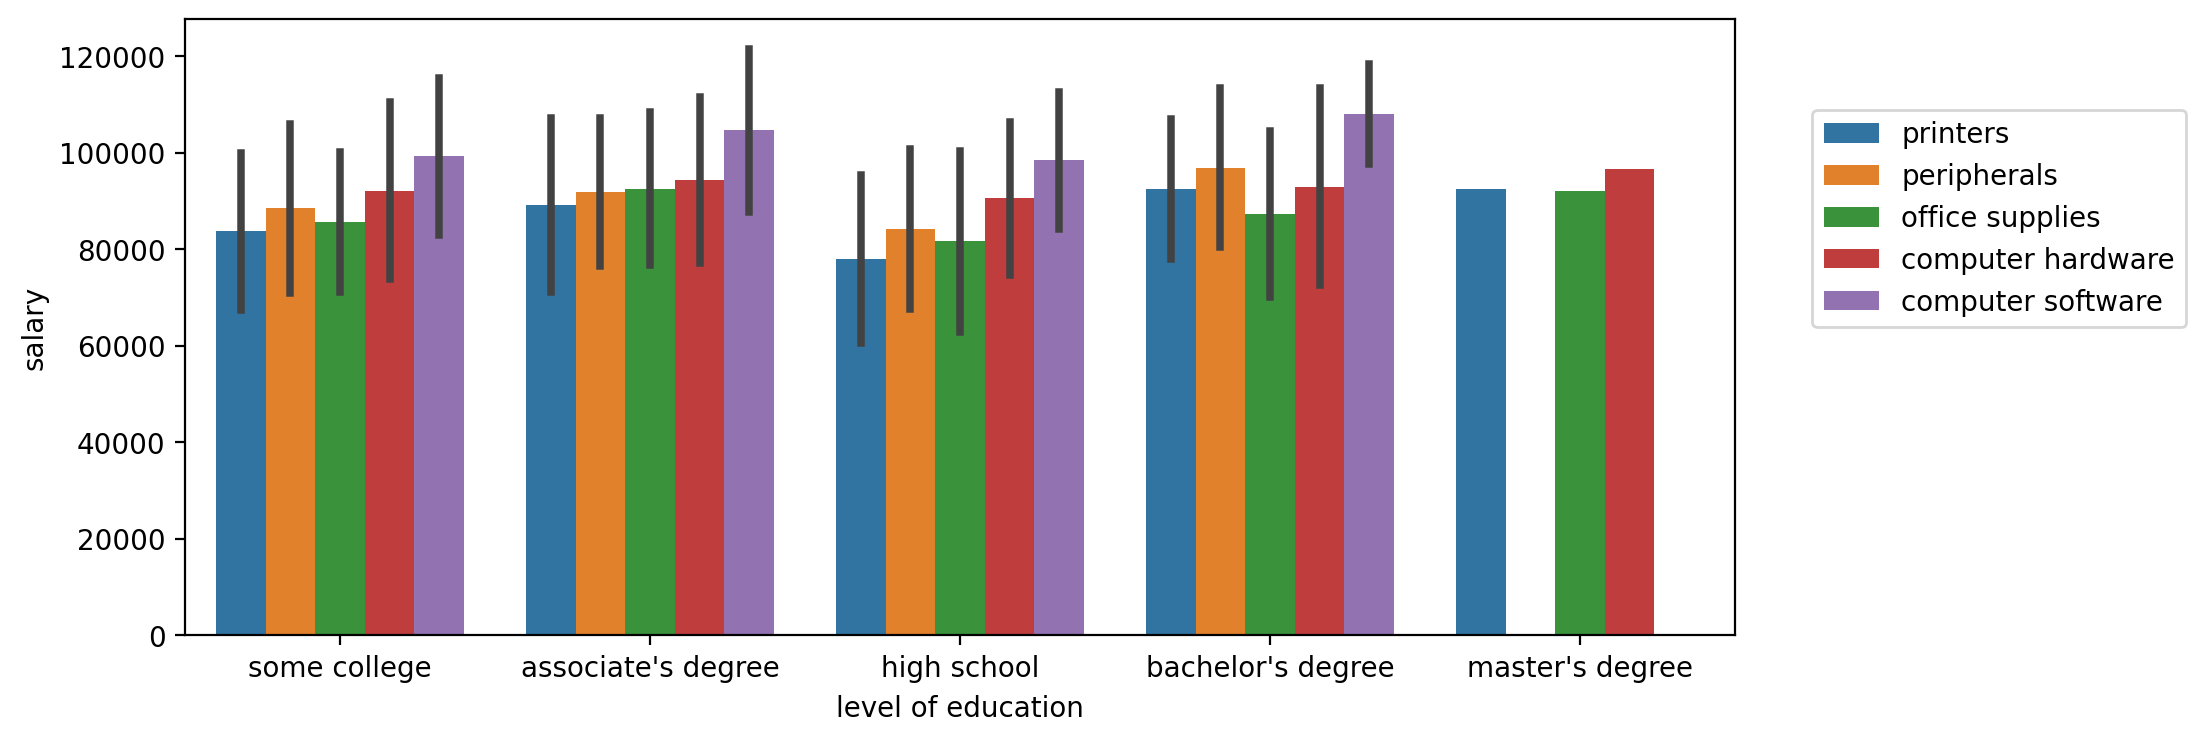

In [ ]:
plt.figure(figsize=(10,4), dpi = 200)


sns.barplot(x='level of education', data=df, y='salary', estimator=np.mean, errorbar='sd', hue='division')
#подсчитали среднее количество продаж у групп по колонке 'level of education'
#также с помощью hue = 'division' разделили людей на подразделения, в которых они работают
#estimator=np.mean - выбрали функцию, которую применять к колонке по оси y
#errorbar='sd' - указали стандартное отклоение значений в группах по оси x


plt.legend(loc=(1.05, 0.5))
#переместили легенду за график

График boxplot
>
Отображает распределение непрерывной переменной
>
Использует квартили
>
Квартили разделяют все данные на 4 равных интервала по количеству точек:
>
25% точек в нижнем квартиле
>
50-й процентиль(Q2) это медиана
>
IQR интерквартильный размах(50 % всех точек)
>
25% точек в верхнем квартиле
>
Boxplot визуально отображает основные статистические характеристики распределения
>
Минус: непонятно сколько людей в категории

In [4]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


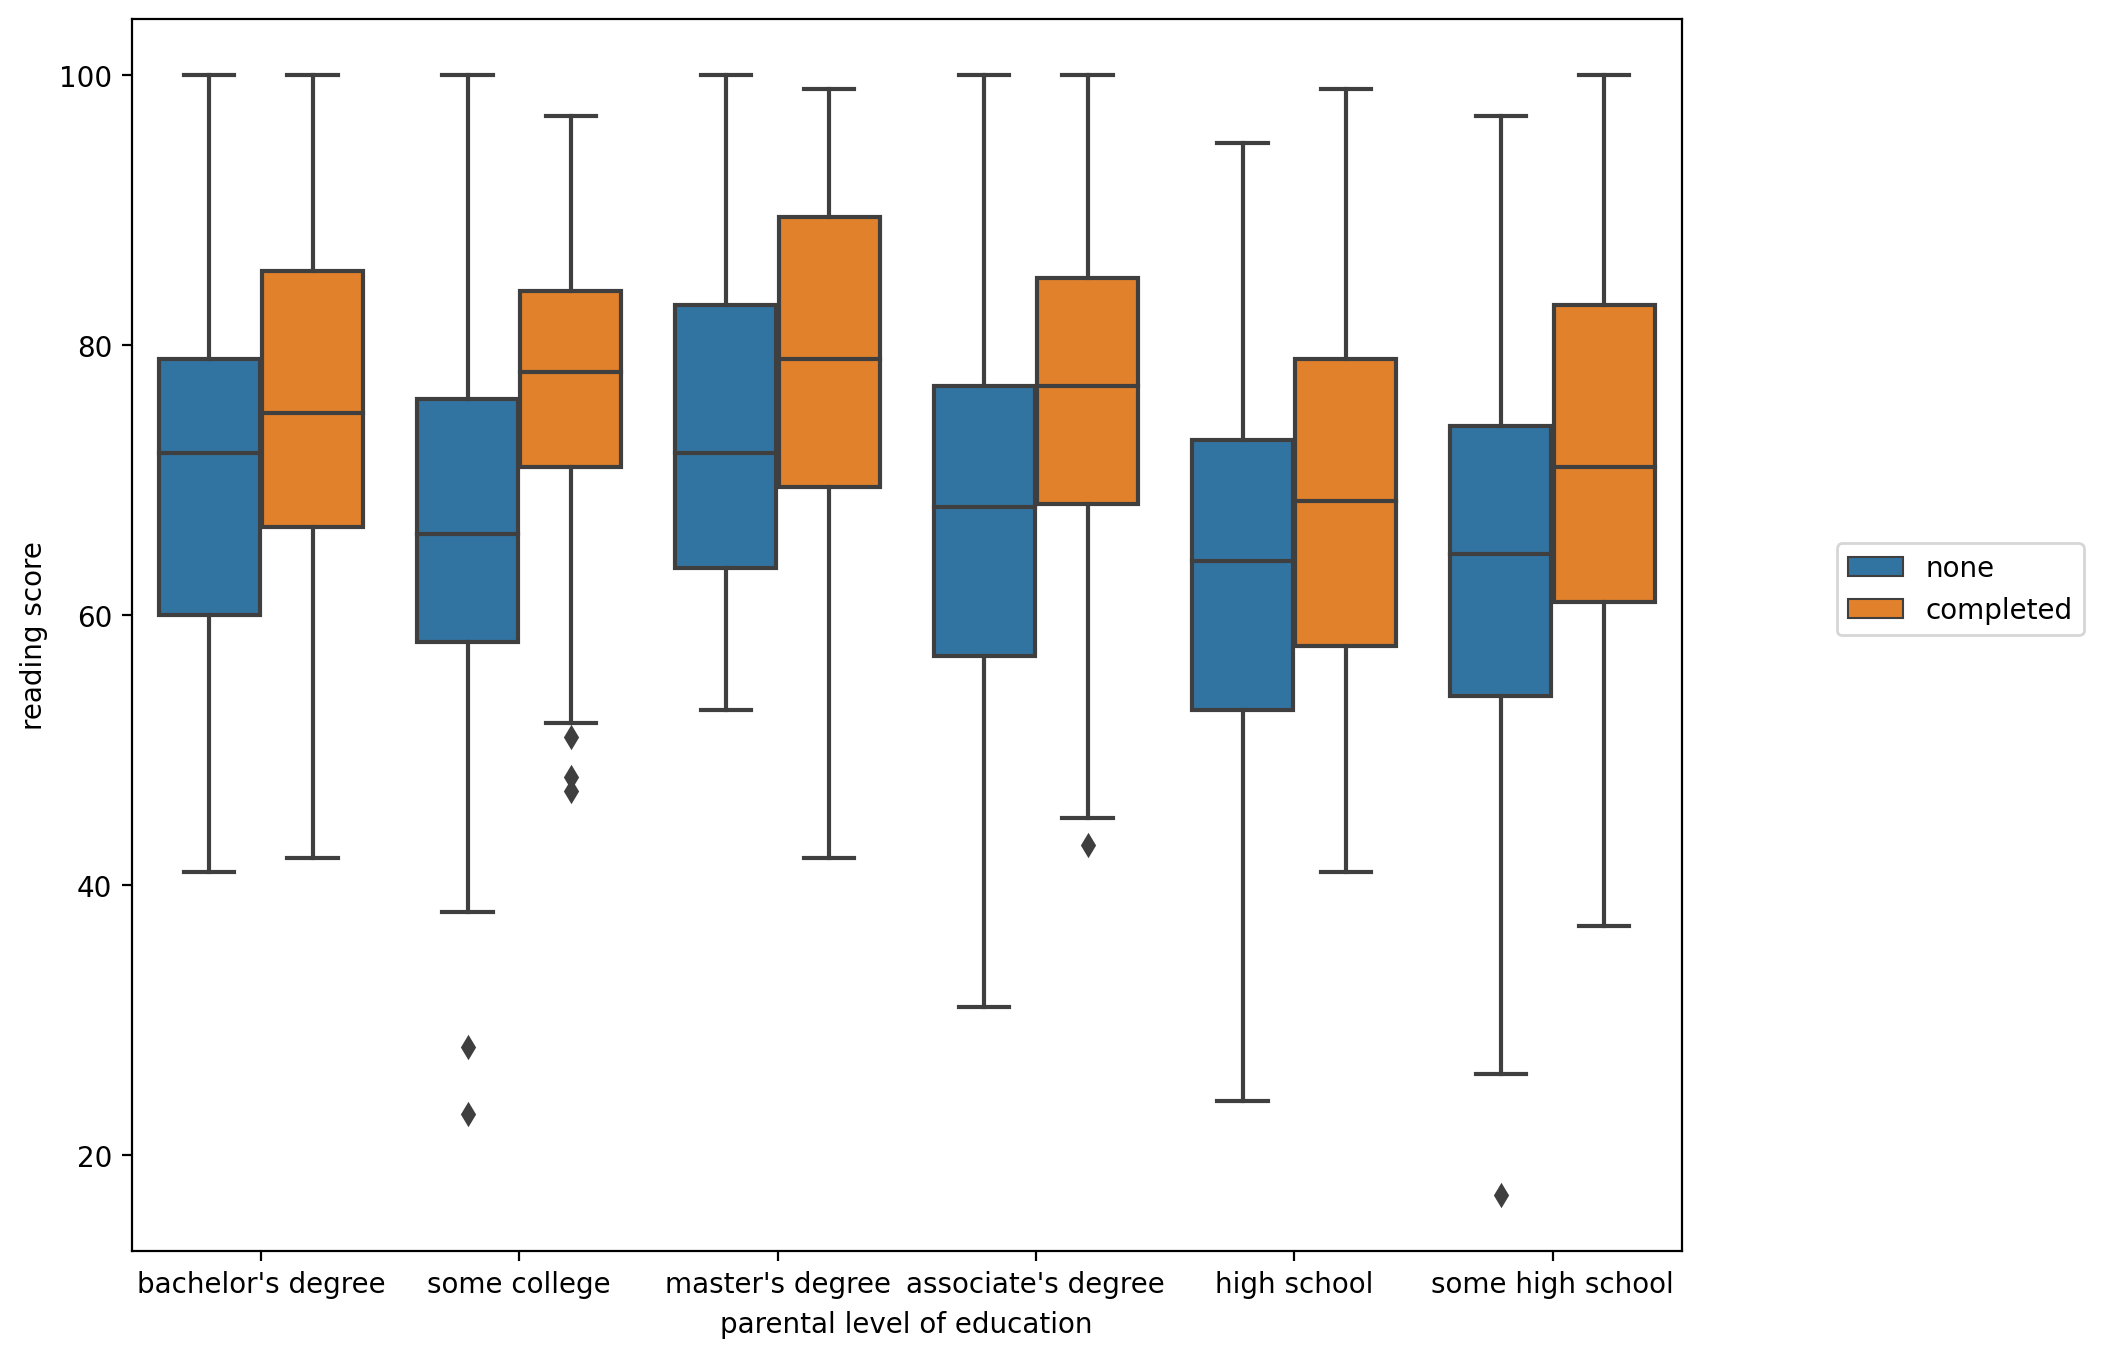

In [13]:
plt.figure(figsize=(10,8), dpi=200)


sns.boxplot(x='parental level of education', y='reading score', data=df, hue='test preparation course')
#построили график boxplot
#чтобы график был горизонтальный, меняем x и y местами


plt.legend(loc=(1.1, 0.5))

График violinplot
>
Отображает плотность распределения по данным с помощью KDE
>
Его можно представить как отзеркаленный KDE график и соединяем их вместе
>
Внутри может располагаться boxplot

<Axes: xlabel='reading score', ylabel='parental level of education'>

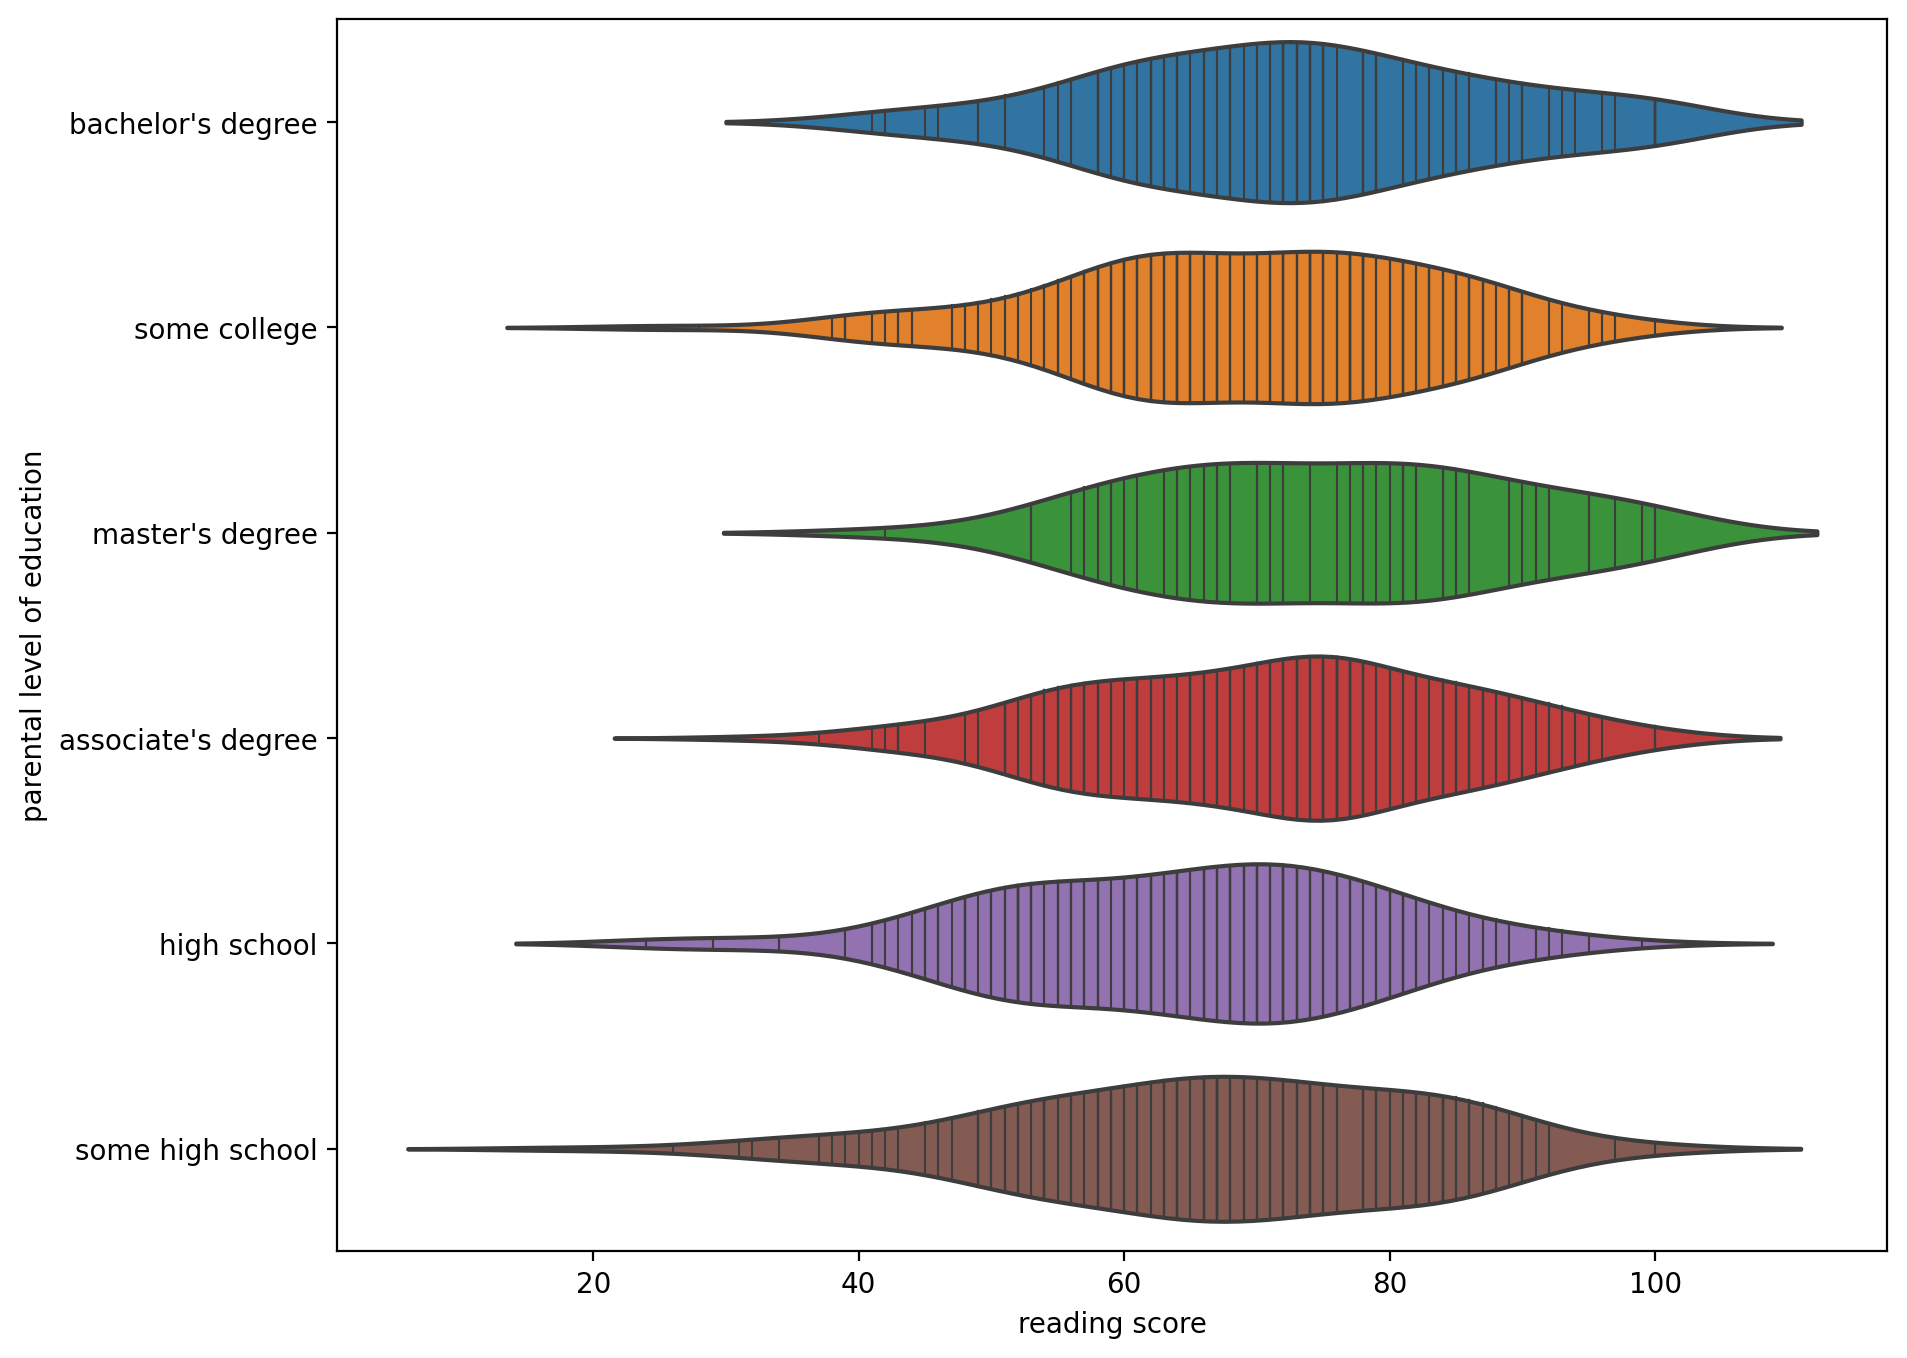

In [24]:
plt.figure(figsize=(10,8), dpi=200)


sns.violinplot(x='reading score', y='parental level of education', data=df, split=True, inner='stick')
#построили график violinplot
#hue - редко используется в violinplot
#split=True - Разделили график на половинки. Альтернатива hue
#inner=None - убрали boxplot внутри
#inner='quartile' - добавили квартили
#inner='stick' - получили отдельные линии для отдельных точек
#bw=0.1 - ширина полосы. В большинтсве случаев оставляем по умолчанию

График swarmplot
>
Отображает все точки в распределении
>
Для очень больших наборов данных он показывает не все точки, а их общее распределение
>
Можем увидеть количество людей в каждой категории

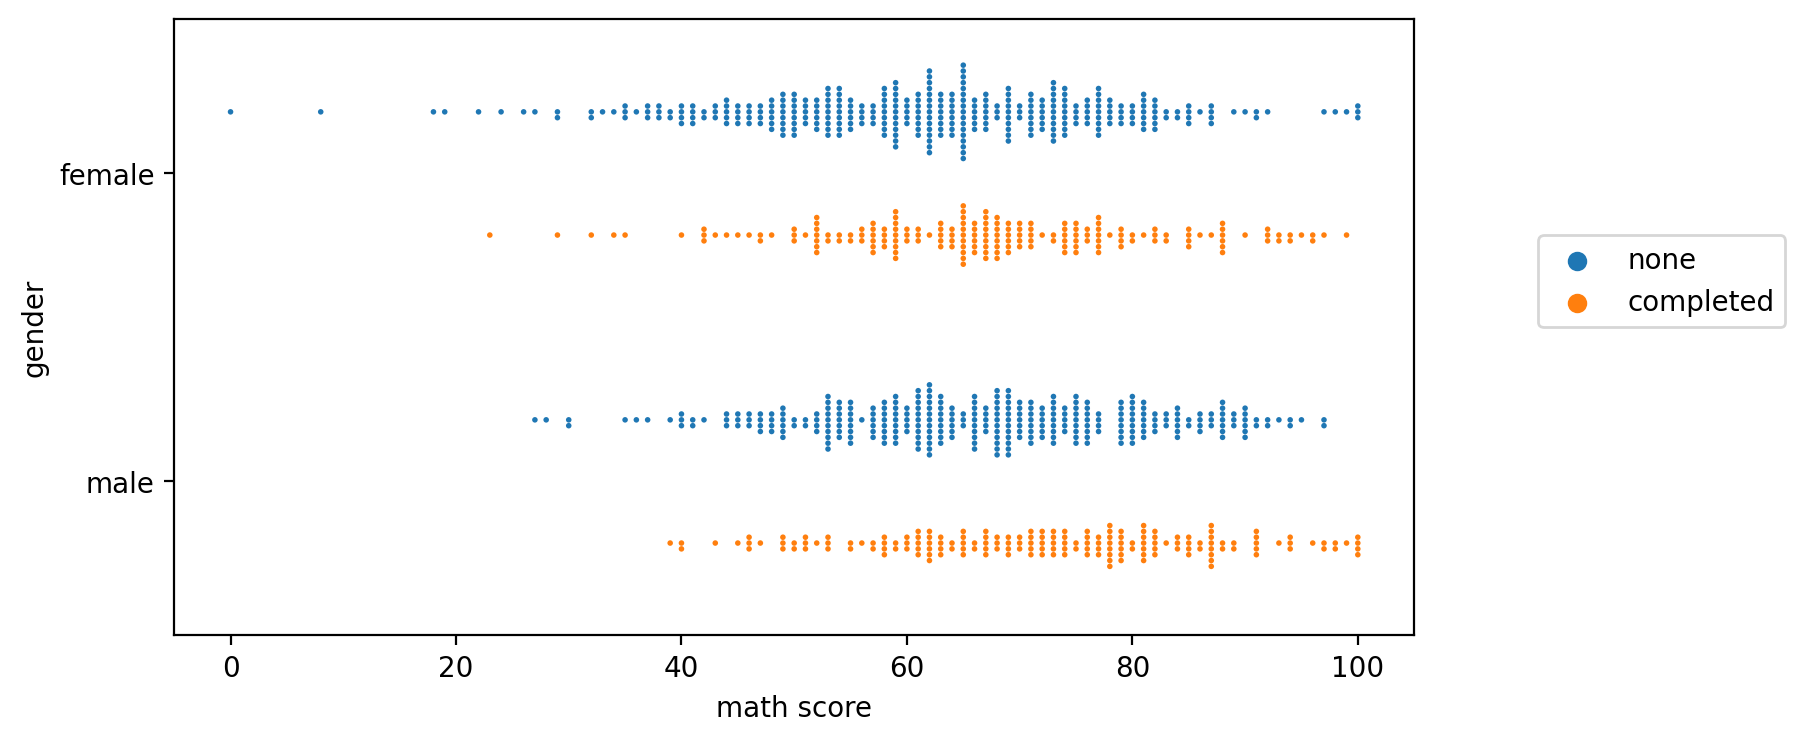

In [31]:
plt.figure(figsize=(8,4), dpi=200)


sns.swarmplot(x='math score', y='gender', data=df, size=2, hue='test preparation course', dodge=True)
#построили график swarmplot
#size=2 - изменили размер точек на графике, чтобы уместить их все
#dodge=True - сделали для каждого цвета точек разные графики


plt.legend(loc=(1.1, 0.5))

График boxenplot
>
Является расширением обычного boxplot
>
Используя набор буква-значение, мы можем вместо строгих квартилей использовать несколько квартилей

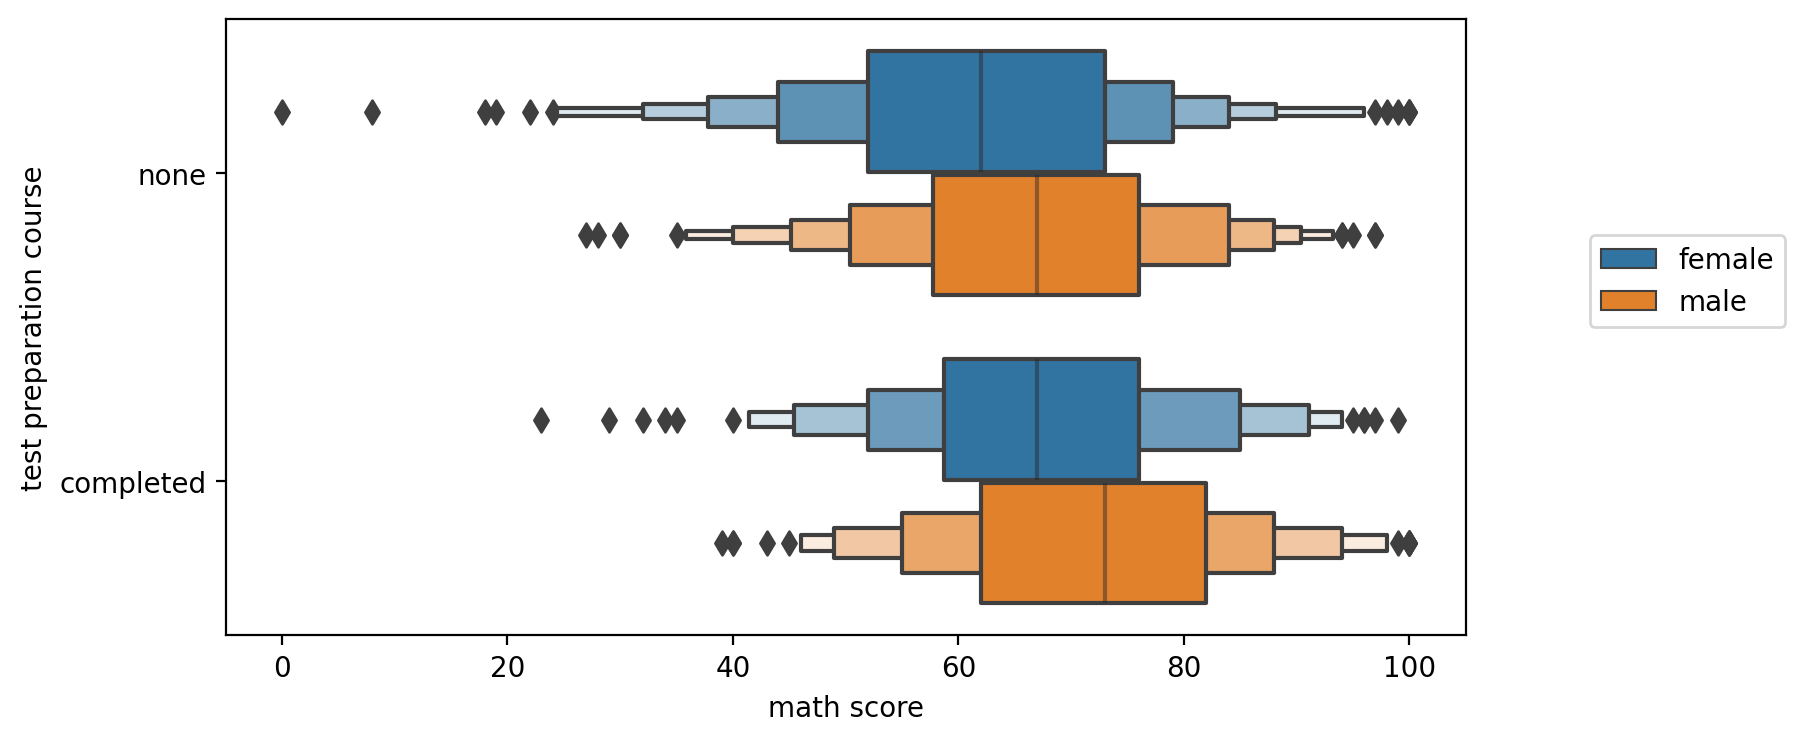

In [33]:
plt.figure(figsize=(8,4), dpi=200)


sns.boxenplot(x='math score', y='test preparation course', data=df, hue='gender')
#построили график boxenplot


plt.legend(loc=(1.1, 0.5))


#у boxenplot и boxplot одни и те же параметры